In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image
from tensorflow.keras import layers
import os
import zipfile

In [5]:
dim = (224, 224)
data_path = "./dataset/images_rec/"
engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_images = engine_images.flow_from_directory(str(data_path), target_size=dim)
test_data_path = "./dataset/test_images_rec/"
test_engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_images = engine_images.flow_from_directory(str(test_data_path), target_size=dim)

Found 59254 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


In [7]:
mobilenet = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                                                                                     input_shape=(224,224,3))
mobilenet.trainable = False #dont train the pretrained model
model = tf.keras.Sequential([mobilenet, layers.Dense(2, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['accuracy'])
num_batches = np.ceil(training_images.samples/32.0)
history = model.fit(training_images, epochs=2, steps_per_epoch=num_batches, validation_data=test_images)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 1852.0 steps, validate for 4 steps
Epoch 1/2
1852/1852 [==============================] - 1812s 978ms/step - loss: 0.0188 - accuracy: 0.9788 - val_loss: 0.0097 - val_accuracy: 0.9920
Epoch 2/2
1852/1852 [==============================] - 1604s 866ms/step - loss: 0.0097 - accuracy: 0.9889 - val_loss: 0.0108 - val_accuracy: 0.9840


In [8]:
model.save("./models/dog_recognition/", save_format='tf')
converter = tf.lite.TFLiteConverter.from_saved_model("./models/dog_recognition/")
tflite_model = converter.convert()
open("./models/tflite/dog_recognition.tflite", "wb").write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: ./models/dog_recognition/assets


INFO:tensorflow:Assets written to: ./models/dog_recognition/assets


8885388

In [87]:
dim = (224, 224)
data_path = "./dataset/train_images/"
engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_images = engine_images.flow_from_directory(str(data_path), target_size=dim)
test_data_path = "./dataset/test_images/"
test_engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_images = engine_images.flow_from_directory(str(test_data_path), target_size=dim)

Found 25974 images belonging to 120 classes.
Found 2900 images belonging to 120 classes.


In [16]:
mobilenet = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                                                                                     input_shape=(224,224,3))
mobilenet.trainable = False #dont train the pretrained model
model = tf.keras.Sequential([mobilenet, layers.Dense(training_images.num_classes, activation='softmax')])
with tf.device('/GPU:0'):
    model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01), loss='categorical_crossentropy', metrics=['acc'])
    num_batches = np.ceil(training_images.samples/32.0)
    history = model.fit(training_images, epochs=10, steps_per_epoch=num_batches, validation_data=test_images)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 812.0 steps, validate for 91 steps
Epoch 1/10
812/812 [==============================] - 129s 159ms/step - loss: 1.6175 - acc: 0.6616 - val_loss: 0.7406 - val_acc: 0.8121
Epoch 2/10
812/812 [==============================] - 137s 169ms/step - loss: 0.7090 - acc: 0.8149 - val_loss: 0.5918 - val_acc: 0.8303
Epoch 3/10
812/812 [==============================] - 142s 175ms/step - loss: 0.5918 - acc: 0.8386 - val_loss: 0.5431 - val_acc: 0.8407
Epoch 4/10
812/812 [==============================] - 142s 175ms/step - loss: 0.5308 - acc: 0.8532 - val_loss: 0.5159 - val_acc: 0.8414
Epoch 5/10
812/812 [==============================] - 142s 175ms/step - loss: 0.4897 - acc: 0.8640 - val_loss: 0.5008 - val_acc: 0.8452
Epoch 6/10
812/812 [==============================] - 142s 175ms/step - loss: 0.4590 - acc: 0.8735 - val_loss: 0.4894 - val_acc: 0.8507
Epoch 7/10
812/812 [==============================] - 156s 192ms/step - loss: 0.4339 - acc: 0.8800 - val_loss: 0.4800 - val_acc: 0.8524
Epo

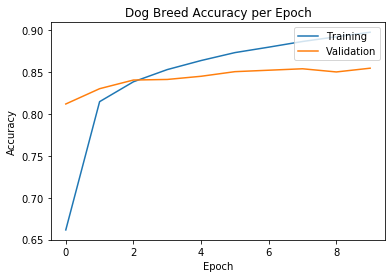

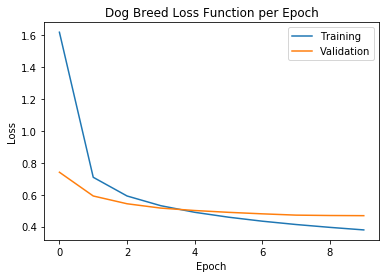

In [55]:
plt.figure().patch.set_facecolor('xkcd:white')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Dog Breed Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

plt.figure().patch.set_facecolor('xkcd:white')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Dog Breed Loss Function per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [18]:
model.save("./models/breed_classifier/", save_format='tf')
converter = tf.lite.TFLiteConverter.from_saved_model("./models/breed_classifier/")
tflite_model = converter.convert()
open("./models/tflite/breed_classifier.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: ./models/breed_classifier/assets


INFO:tensorflow:Assets written to: ./models/breed_classifier/assets


9490016

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
breeds = sorted(test_images.class_indices.items(), key=lambda pair:pair[1])
breeds = np.array([breed.title() for breed, val in breeds])
d={}
j=0
for x in breeds:
    d[x.upper()]=j
    j+=1
test_data_path = "./dataset/test_images/"
conf_mat=np.zeros((120,120))
i=0
for root, dirs, files in os.walk(test_data_path, topdown=False):
    for name in files:
        image=Image.open(os.path.join(root, name)).resize(dim)
        image = np.array(image)/255.0
        if(image.shape==(224,224,3)):
            outputs = model.predict(image[np.newaxis, ...])
            prediction = np.argmax(outputs[0], axis=-1)
            label=root[22:]
            conf_mat[d[label.upper()]][prediction]+=1
        if(i%100==0):
            print(i)
        i+=1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


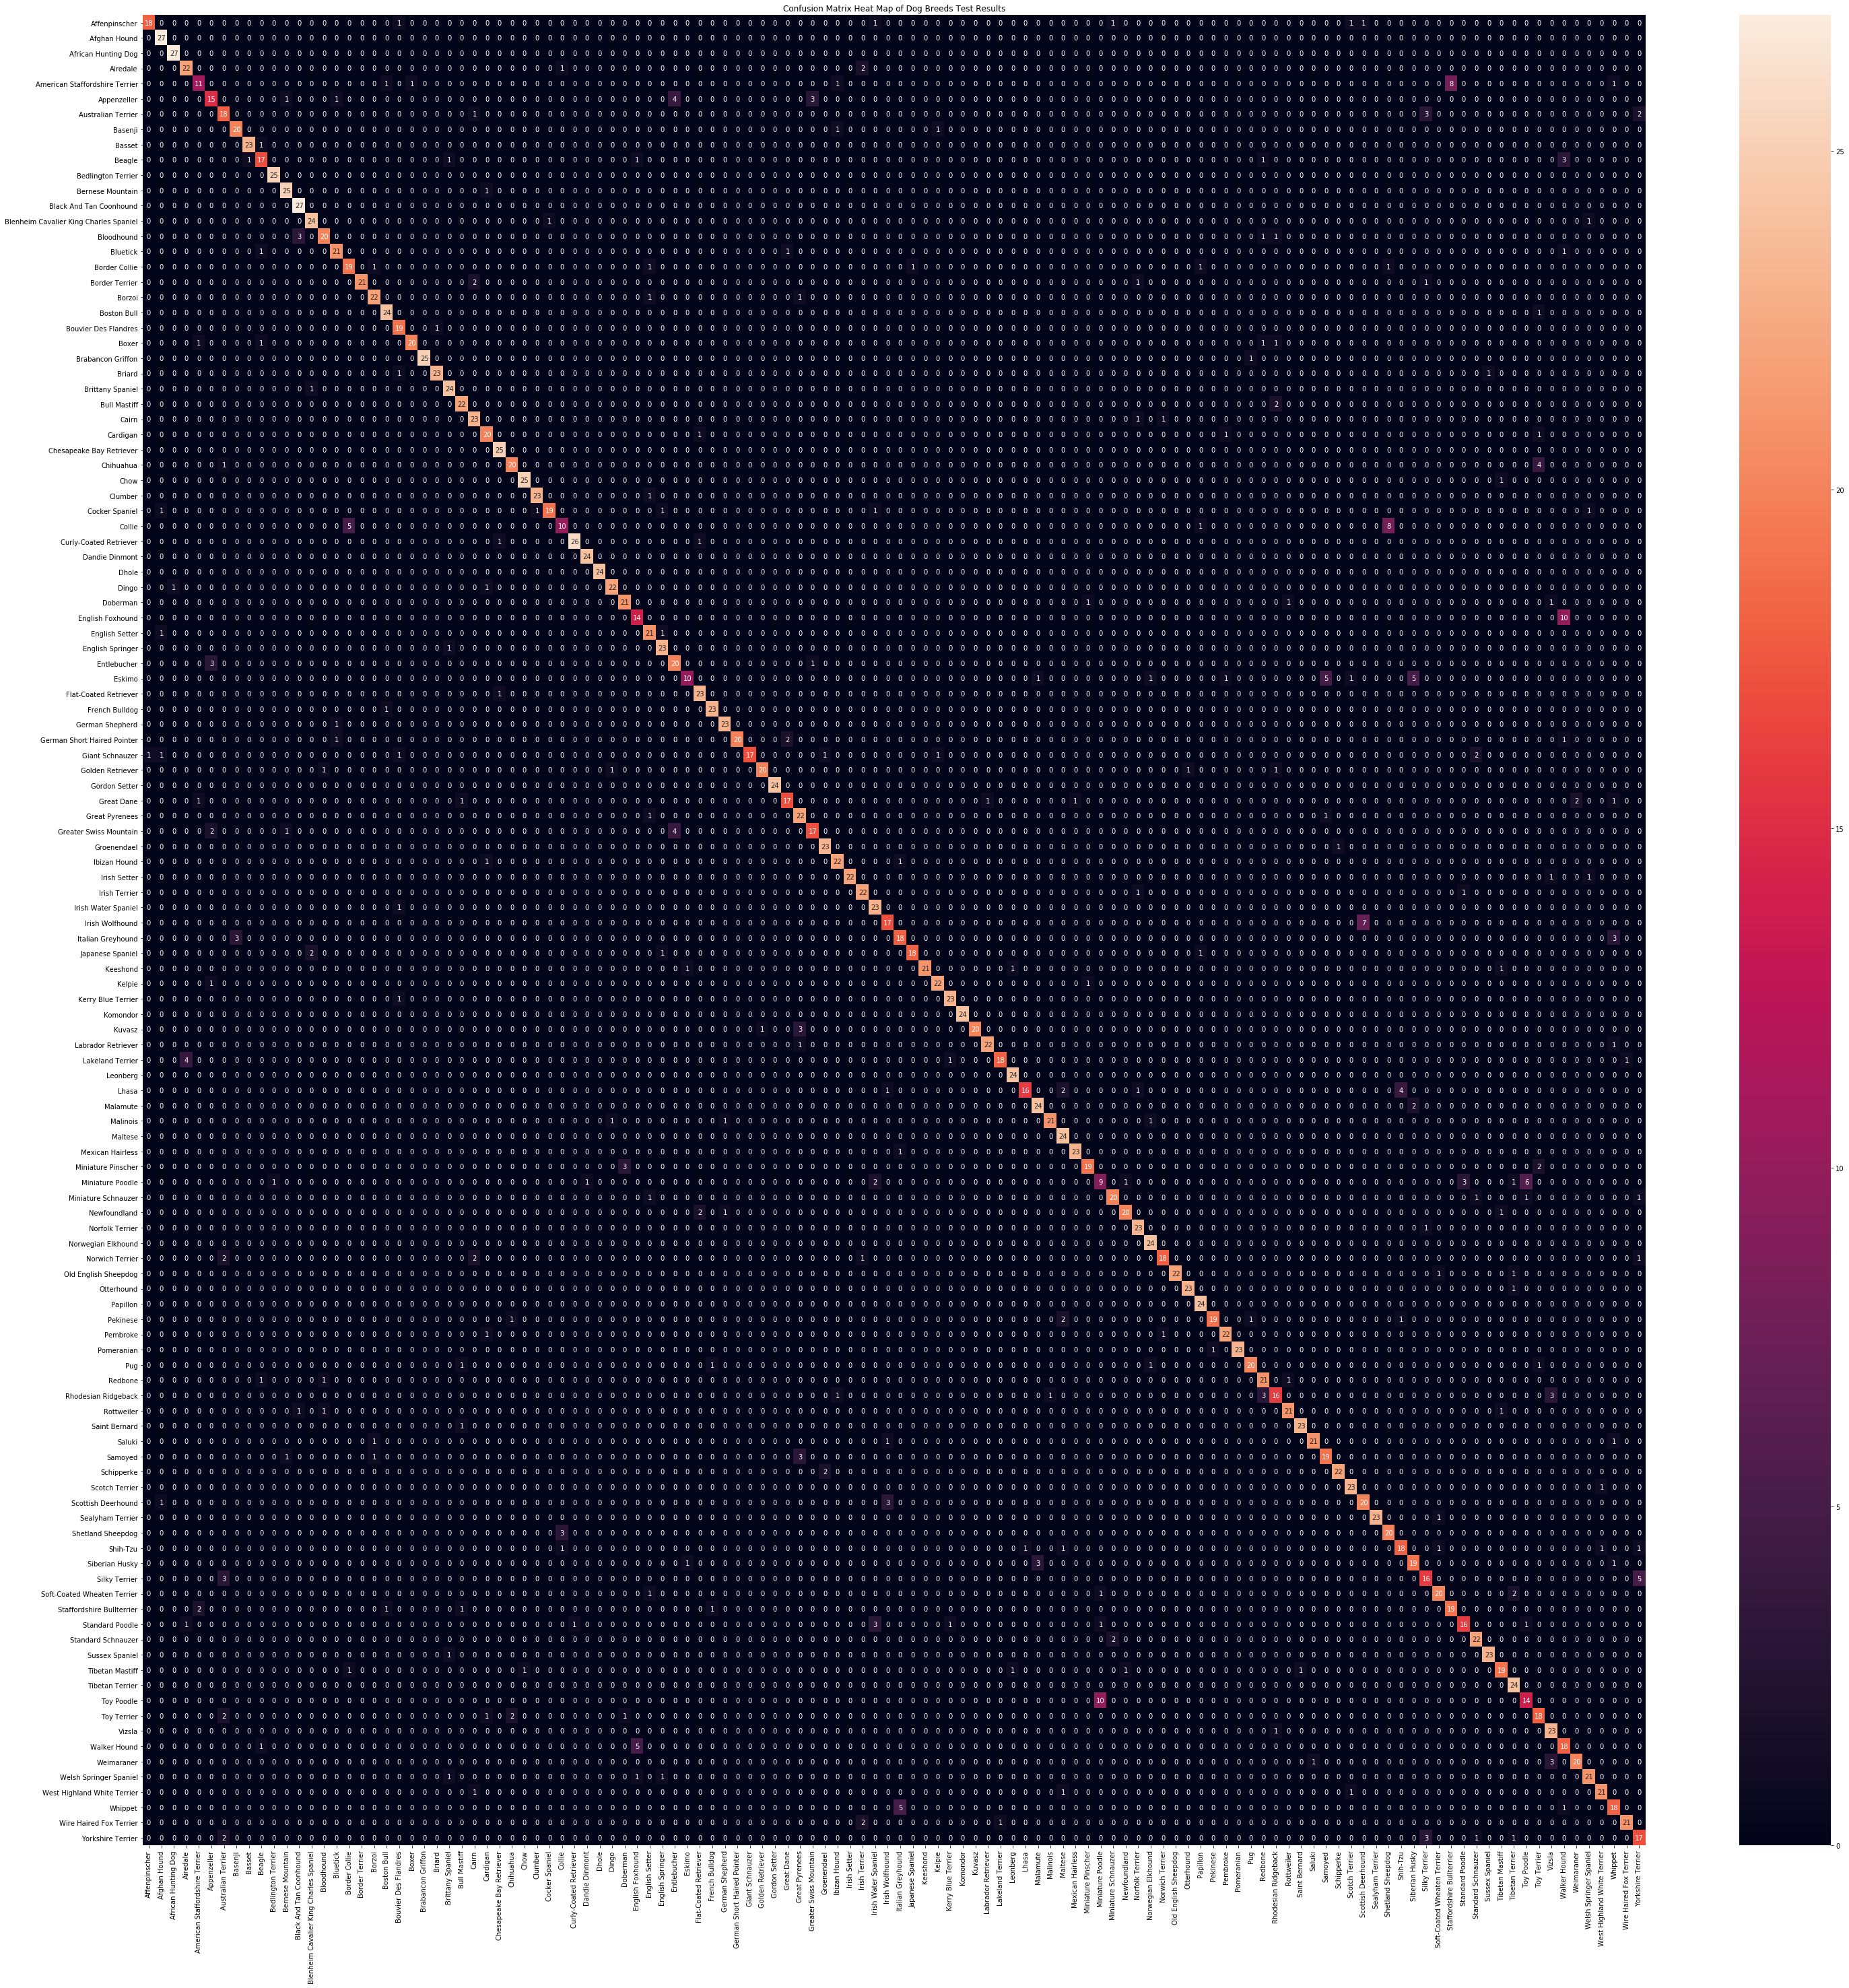

In [125]:
clean = pd.DataFrame(conf_mat, index = [i for i in breeds],
                  columns = [i for i in breeds])
plt.figure(figsize = (50,50)).patch.set_facecolor('xkcd:white')
plt.title("Confusion Matrix Heat Map of Dog Breeds Test Results")
sn.heatmap(clean, annot=True)